In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

Уравнение линейной регрессии:

$y = a + bx$

Коэффициенты уравнения линейной регрессии:

$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}$

$a = \overline{y} - b \cdot {\overline{x}}$

In [ ]:
# Решение через формулы
# С интерсептом

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2) # коэффициент b
a = np.mean(y) - b * np.mean(x) # коэффициент a

print(f'y = {a:.2f} + {b:.2f}x')

y = 444.18 + 2.62x


In [ ]:
# Решение через матрицу
# С интерсептом

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(x)

x_r = x.reshape((10, 1))
y_r = y.reshape((10, 1))

x_r = np.hstack([np.ones((10, 1)), x_r]) # добавляем столбец единиц для интерсепта
coff = np.dot(np.linalg.inv(np.dot(x_r.T, x_r)), x_r.T@y_r) # коэффициенты b и a

b = round(coff[1][0], 2)
a = round(coff[0][0], 2)

y_hat = a + b*x

mse = round(sum((y - y_hat)**2)/n, 2)

print(f'y_hat = {a} + {b}x\n')
print(f'mse = {mse}')

y_hat = 444.18 + 2.62x

mse = 6470.42


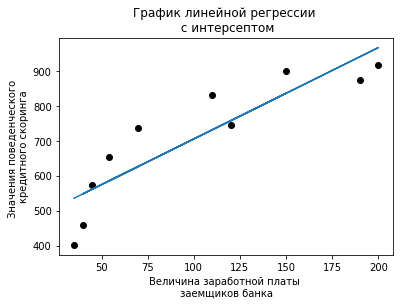

In [ ]:
plt.scatter(x, y, c='black')
plt.plot(x, y_hat)
plt.xlabel('Величина заработной платы \nзаемщиков банка')
plt.ylabel('Значения поведенческого \nкредитного скоринга')
plt.title('График линейной регрессии \n с интерсептом')
plt.show()

In [ ]:
# Решение через матрицу
# БЕЗ интерсепта

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(x)

x_r = x.reshape((10, 1))
y_r = y.reshape((10, 1))
coff = np.dot(np.linalg.inv(np.dot(x_r.T, x_r)), x_r.T@y_r) # коэффициенты b и a

b = round(coff[0][0], 2)

y_hat_2 = b*x

mse = round(sum((y - y_hat_2)**2)/n, 2)

print(f'y_hat = {b}x\n')
print(f'mse = {mse}')

y_hat = 5.89x

mse = 56516.86


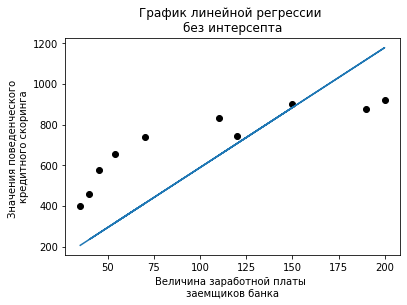

In [ ]:
plt.scatter(x, y, c='black')
plt.plot(x, y_hat_2)
plt.xlabel('Величина заработной платы \nзаемщиков банка')
plt.ylabel('Значения поведенческого \nкредитного скоринга')
plt.title('График линейной регрессии \nбез интерсепта')
plt.show()

**2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [ ]:
# Решение через градиентный спуск
# БЕЗ интерсепта

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(x)
alpha = 0.000001 # скорость обучения
b1 = 0.1 # стартовое значение

# функция расчета среднеквадратичной ошибки
def mse_(b1, y=y, x=x, n=n):
  return np.sum((b1*x - y)**2)/n

# метод градиентного спуска
for i in range(2000):
  b1 -= alpha*(2/n)*np.sum((b1*x - y)*x) # производная от mse по b1
  if i%200 == 0:
    print(f'Iteration: {i}, b1 = {b1}, mse= {mse_(b1)}')

b1 = round(b1, 2)
mse = round(mse_(b1), 2)

Iteration: 0, b1 = 0.25952808, mse= 493237.7212546963
Iteration: 200, b1 = 5.868748638669329, mse= 56522.97550129376
Iteration: 400, b1 = 5.8897415574471985, mse= 56516.85850140053
Iteration: 600, b1 = 5.889820124983314, mse= 56516.85841572062
Iteration: 800, b1 = 5.88982041902807, mse= 56516.8584157194
Iteration: 1000, b1 = 5.8898204201285544, mse= 56516.85841571941
Iteration: 1200, b1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1400, b1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1600, b1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1800, b1 = 5.889820420132673, mse= 56516.85841571943


In [ ]:
print(f'y_hat = {b1}x\n')
print(f'mse = {mse}')

y_hat = 5.89x

mse = 56516.86


**3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

Таблица значений функции Лапласа используется, когда мы **знаем** дисперсию или среднюю квадратичную ошибку генеральной совокупности.

Таблица критических точек распределения Стьюдента используется, когда мы **не знаем** ни дисперсию ни среднюю квадратичную ошибку генеральной совокупности.

**4*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [50]:
# Решение через градиентный спуск
# С интерсептом

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(x)
alpha = 0.000001 # скорость обучения
b1 = 0.1 # стартовое значение
b0 = 0.1

# функция расчета среднеквадратичной ошибки
def mse_(b1, b0, y=y, x=x, n=n):
  return np.sum(((b0 + b1*x) - y)**2)/n

# метод градиентного спуска
for i in range(5000):
  b1 -= alpha*(2/n)*np.sum((b0 + b1*x - y)*x) # производная от mse по b1
  b0 -= (2/n)*np.sum(b0 + b1*x - y) # производная от mse по b0
  if i%500 == 0:
    print(f'Iteration: {i}, b0 = {b0} b1 = {b1}, mse= {mse_(b1, b0)}')

b1 = round(b1, 2)
b0 = round(b0, 2)
mse = round(mse_(b1, b0), 2)

Iteration: 0, b0 = 1367.07181816 b1 = 0.2595078, mse= 493104.16016708425
Iteration: 500, b0 = 451.29950391665705 b1 = 2.5502517245170035, mse= 6487.678741937202
Iteration: 1000, b0 = 444.38267170216244 b1 = 2.618506891167808, mse= 6470.428631036828
Iteration: 1500, b0 = 444.18329273921927 b1 = 2.6204801395792807, mse= 6470.414213236121
Iteration: 2000, b0 = 444.1775289112296 b1 = 2.6205371842068543, mse= 6470.414201186734
Iteration: 2500, b0 = 444.17736228476343 b1 = 2.6205388333096304, mse= 6470.414201176669
Iteration: 3000, b0 = 444.17735746775986 b1 = 2.6205388809835326, mse= 6470.414201176657
Iteration: 3500, b0 = 444.1773573285053 b1 = 2.620538882361735, mse= 6470.414201176655
Iteration: 4000, b0 = 444.1773573244796 b1 = 2.6205388824015787, mse= 6470.414201176658
Iteration: 4500, b0 = 444.1773573243628 b1 = 2.6205388824027342, mse= 6470.41420117666


In [51]:
print(f'y_hat = {b0} + {b1}x\n')
print(f'mse = {mse}')

y_hat = 444.18 + 2.62x

mse = 6470.42
